#Fly PosteriorSpiracles

In [2]:
from fastai.vision.all import *
from fastai.test_utils import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
root_dir = '{root path}'
base_dir = root_dir 
path=Path(base_dir)
path.ls()

In [5]:
fields = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   item_tfms=Resize(224),
   batch_tfms=[*aug_transforms()])

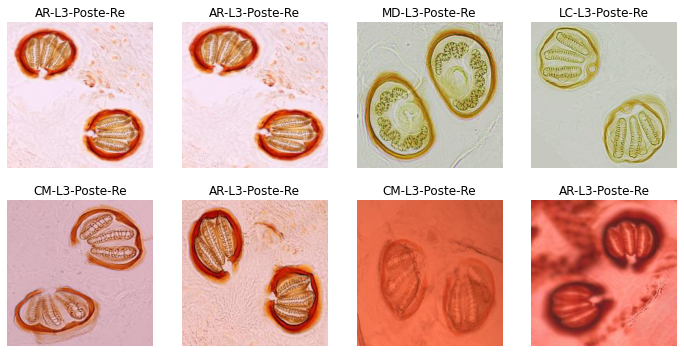

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

#Model: Resnet101


In [ ]:
learn_resnet101 = cnn_learner(dls, resnet101, metrics=[accuracy, error_rate])

In [ ]:
learn_resnet101.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

In [ ]:
learn_resnet101.fit_one_cycle(50)

In [ ]:
interp_resnet101 = ClassificationInterpretation.from_learner(learn_resnet101)
interp_resnet101.plot_confusion_matrix()

In [ ]:
interp_resnet101.print_classification_report()

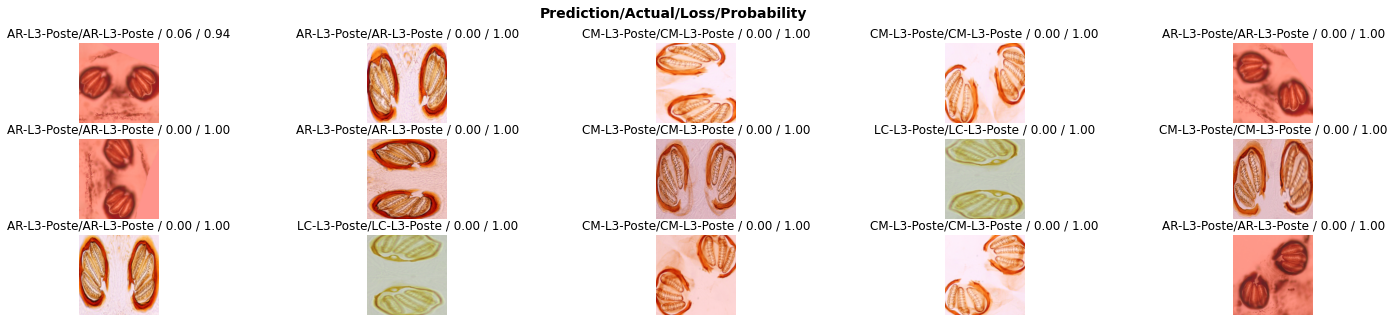

In [ ]:
interp_resnet101.plot_top_losses(15, nrows=3, figsize = (25,5))

#Model: Densenet169

In [ ]:
learn_densenet169 = cnn_learner(dls, densenet169, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

In [ ]:
learn_densenet169.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 128 x 56 x 56  
Conv2d                                    8192       False     
BatchNorm2d                               256        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 56 x 56   
Conv2d                                    36864    

In [ ]:
learn_densenet169.fit_one_cycle(50)

In [ ]:
interp_densenet169 = ClassificationInterpretation.from_learner(learn_densenet169)
interp_densenet169.plot_confusion_matrix()

In [ ]:
interp_densenet169.print_classification_report()

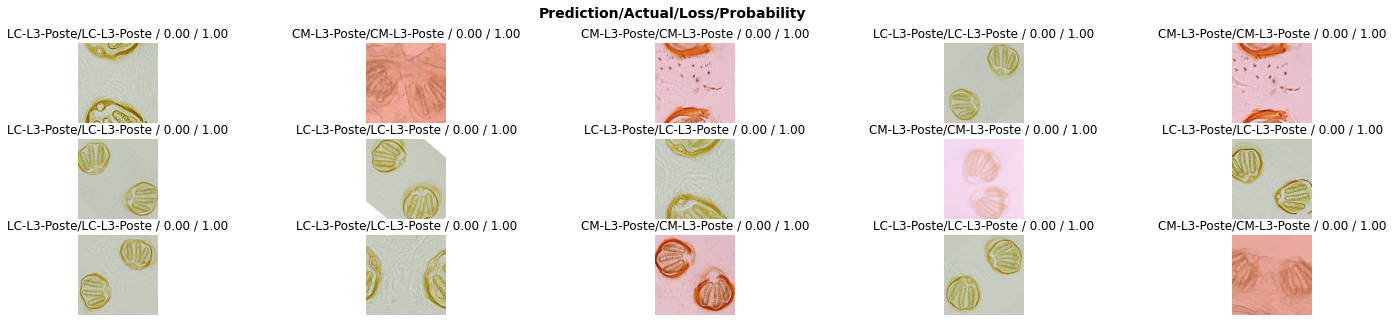

In [ ]:
interp_densenet169.plot_top_losses(15, nrows=3, figsize = (25,5))

#Model: Vgg19_bn

In [ ]:
learn_vgg19 = cnn_learner(dls, vgg19_bn, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn_vgg19.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 224 x 224 
Conv2d                                    1792       False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36928      False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 112 x 11 
Conv2d                                    73856      False     
BatchNorm2d                               256        True      
ReLU                                                           
Conv2d                                    147584     False     
BatchNorm2d                               

In [ ]:
learn_vgg19.fit_one_cycle(50)

In [ ]:
interp_vgg19 = ClassificationInterpretation.from_learner(learn_vgg19)
interp_vgg19.plot_confusion_matrix()

In [ ]:
interp_vgg19.print_classification_report()

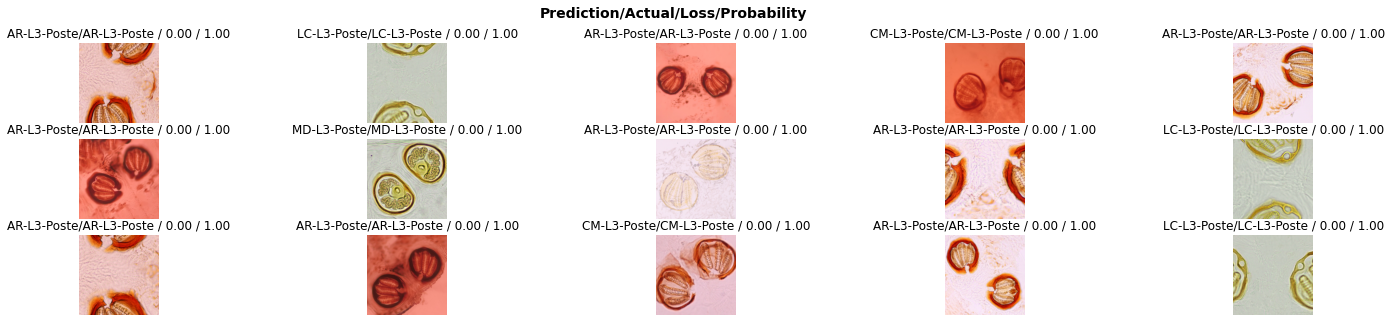

In [ ]:
interp_vgg19.plot_top_losses(15, nrows=3, figsize = (25,5))

#Model: Alexnet

In [ ]:
learn_alexnet = cnn_learner(dls, alexnet, metrics=[accuracy, error_rate], cbs=[ShowGraphCallback(), SaveModelCallback()])

In [ ]:
learn_alexnet.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 55 x 55   
Conv2d                                    23296      False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 27 x 27   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 192 x 27 x 27  
Conv2d                                    307392     False     
ReLU                                                           
____________________________________________________________________________
                     64 x 192 x 13 x 13  
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 384 x

In [ ]:
learn_alexnet.fit_one_cycle(50)

In [ ]:
interp_alexnet = ClassificationInterpretation.from_learner(learn_alexnet)
interp_alexnet.plot_confusion_matrix()

In [ ]:
interp_alexnet.print_classification_report()

In [ ]:
interp_alexnet.plot_top_losses(15, nrows=3, figsize = (25,5))